In [2]:
import os, sys, math
sys.path.insert(0, '..')
import numpy as np
import itertools

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import smplotlib
import statsmodels.api as sm

from src import *

In [3]:
invited = [
    [(0,2)]*9306,
    [(2,4)]*8068,
    [(4,6)]*7871,
    [(6,8)]*4982,
    [(8,100)]*4641
]
attended = [
    [(0,2)]*3575,
    [(2,4)]*3880,
    [(4,6)]*6088,
    [(6,8)]*6318,
    [(8,100)]*7429
]

In [4]:
invited = list(itertools.chain(*invited))
attended = list(itertools.chain(*attended))

In [5]:
tester = teddr.TEDDRTester(
    locale_intervals1=attended, 
    locale_intervals2=invited,
    cdf_uncertainty="gaussian"
)

In [6]:
S, p, s1, s2 = tester.utest(100, 100, return_samples=True)
print(p)

2.5599238253737197e-12


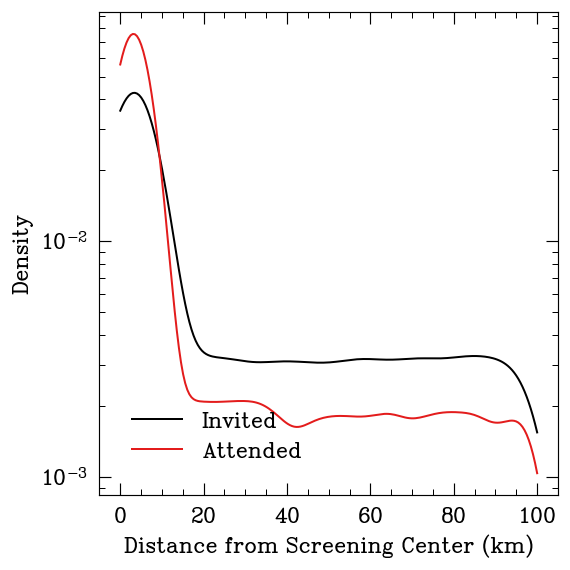

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.kdeplot(s1, label="Invited", clip=(0, 100), ax=axes)
sns.kdeplot(s2, label="Attended", clip=(0, 100), ax=axes)
axes.set_yscale("log")
axes.set_xlabel("Distance from Screening Center (km)")
axes.legend(loc="lower left")
# axes[0].text(0.95, 0.95, 'A)', 
#      transform=axes[0].transAxes, 
#      verticalalignment='top', 
#      horizontalalignment='right', 
#      fontweight='bold',
#      fontsize=22
# )

# distances = np.concatenate([s1, s2])
# outcomes = np.concatenate([np.zeros(len(s1)), np.ones(len(s2))]) # 1 for attended, 0 for invited

# distances_sm = sm.add_constant(distances)  # adding a constant for the intercept
# logit_model = sm.Logit(outcomes, distances_sm).fit(disp=0)  # fit the model quietly

# distances_grid = np.linspace(0, 100, 300)
# distances_grid_sm = sm.add_constant(distances_grid)
# predicted_probs = logit_model.predict(distances_grid_sm)

# axes[1].plot(distances_grid, predicted_probs, color='red')
# axes[1].set_xlabel("Distance from Screening Center (km)")
# axes[1].set_ylabel('Predicted Probability of Attendance')
# axes[1].text(0.95, 0.95, 'B)', 
#      transform=axes[1].transAxes, 
#      verticalalignment='top', 
#      horizontalalignment='right', 
#      fontweight='bold',
#      fontsize=22
# )

plt.tight_layout()
plt.savefig("reanalysis_compact.png")
plt.show()


In [ ]:
p, ci, odds = probability.calculate_odds_ratio(s1, s2, with_ci=True, return_pvalue=True)
print(p, ci, odds)